In [1]:
from cellSAM.cellsam_pipeline import cellsam_pipeline

/home/aiqbal/miniconda3/envs/cellsam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/aiqbal/miniconda3/envs/cellsam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/aiqbal/miniconda3/envs/cellsam/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pyto

Warning, using standard model. For better performance, use a model trained on your data.


/home/aiqbal/notebooks/cellSAM/cellSAM/model.py:91: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location="cpu"), strict=Fa

283


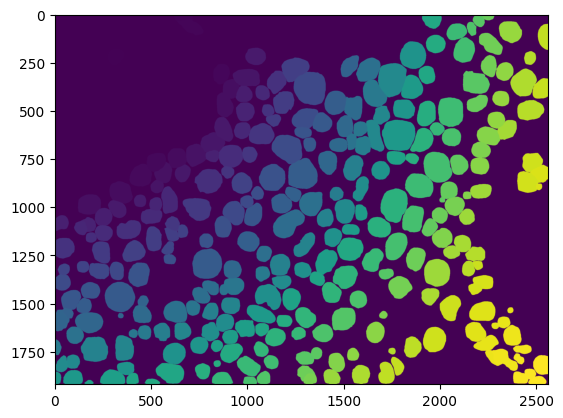

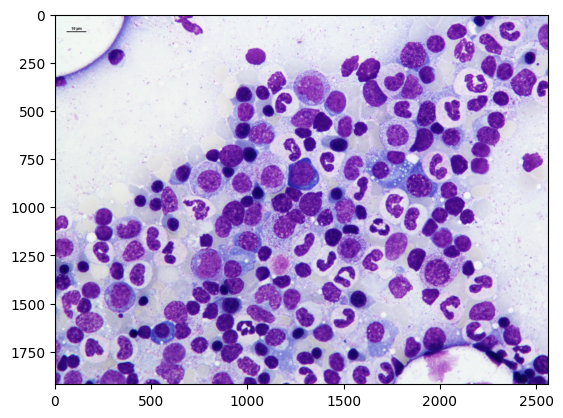

In [2]:
# Non-tiling example
m1 = cellsam_pipeline(
    img='/home/aiqbal/notebooks/cellSAM/debugdata/images/OpenTest_049.tif',
    model_path=None,
    chunks=256,
    block_size=500,
    overlap=200,
    iou_depth=200,
    low_contrast_enhancement=False,
    use_wsi=False, # Don't use tiling
    gauge_cell_size=False,
    visualize=True,
)

Warning, using standard model. For better performance, use a model trained on your data.


/home/aiqbal/notebooks/cellSAM/cellSAM/model.py:91: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location="cpu"), strict=Fa

Total blocks: 24


24it [01:04,  2.68s/it]
100%|██████████| 238/238 [00:01<00:00, 223.20it/s]


229


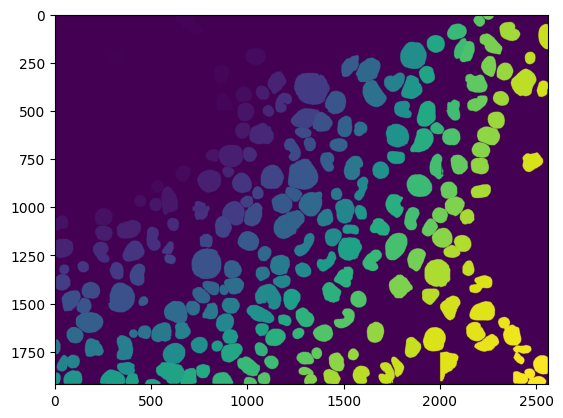

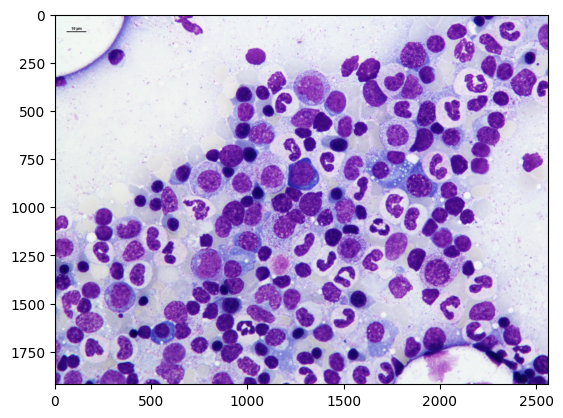

In [3]:
# Tiling example
m2 = cellsam_pipeline(
    img='/home/aiqbal/notebooks/cellSAM/debugdata/images/OpenTest_049.tif',
    model_path=None,
    chunks=256,
    block_size=500, # Side length of each tile before overlap
    overlap=200,
    iou_depth=200,
    low_contrast_enhancement=False,
    use_wsi=True, # Use tiling
    gauge_cell_size=False,
    visualize=True,
)